### Implementation of machine learning models

In [33]:
train   = pd.read_csv(path + "train_processed.csv", sep=",",low_memory=False)

### Here I used the data set  processed using the methods included in the example of class as the training set.

In [35]:
train = train.drop("Unnamed: 0",axis = 1)

In [36]:
train.head()

,client_id,pdays,emp_var_rate,euribor3m,nr_employed,pdays_999,woe_month_binned,woe_emp_var_rate_binned,woe_cons_price_idx_binned,woe_cons_conf_idx_binned,...,euribor3m_binned_woe,nr_employed_binned_woe,emp_var_rate_freq_bin_woe,euribor3m_freq_bin_woe,nr_employed_freq_bin_woe,emp_var_rate_width_bin_woe,cons_conf_idx_width_bin_woe,euribor3m_width_bin_woe,nr_employed_width_bin_woe,subscribe
0,2,999,1.1,4.858,5191.0,1,-33.396928,-94.568514,-123.938356,9.414245,...,-2.616464,-2.896025,-3.289431,-3.192275,-3.289431,-2.995732,-2.671493,-2.929108,-2.896025,0
1,5,999,-1.8,1.299,5099.1,1,-33.396928,44.145704,30.177277,-59.006784,...,-2.616464,-1.971674,-1.429056,-2.098587,-1.974348,-1.540039,-1.876394,-1.171029,-1.691018,0
2,8,999,-0.1,4.153,5195.8,1,-33.396928,44.145704,-33.246837,-59.006784,...,-2.616464,-2.896025,-2.363994,-2.098587,-2.363994,-2.370244,-2.756119,-2.639057,-2.896025,0
3,21,999,1.4,4.967,5228.1,1,-33.396928,-94.568514,-33.246837,-106.548634,...,-2.616464,-2.896025,-2.876386,-2.833213,-2.876386,-2.995732,-2.671493,-2.929108,-2.896025,0
4,22,999,1.4,4.964,5228.1,1,-33.396928,-94.568514,-33.246837,-106.548634,...,-2.616464,-2.896025,-2.876386,-2.833213,-2.876386,-2.995732,-2.671493,-2.929108,-2.896025,1


In [37]:
from sklearn.model_selection import train_test_split

X = train[train.columns[~train.columns.isin(['client_id', 'subscribe'])]]
y = train[['subscribe']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify = y)

logistic 	 AUC: 0.7852044753086419 
Accuracy: 0.8976190476190476 
Precision: 0.6530612244897959 
 
F1: 0.33160621761658027 
 {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
          pred:yes  pred:no
true:yes      1099       17
true:no        112       32 

randomForest 	 AUC: 0.7938165820390282 
Accuracy: 0.8166666666666667 
Precision: 0.33707865168539325 
 
F1: 0.43795620437956206 
 {'class_weight': 'balanced', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 600}
          pred:yes  pred:no
true:yes       939      177
true:no         54       90 

knn 	 AUC: 0.6646972072879331 
Accuracy: 0.8865079365079365 
Precision: 0.5079365079365079 
 
F1: 0.30917874396135264 
 {'leaf_size': 4, 'n_neighbors': 15, 'weights': 'distance'}
          pred:yes  pred:no
true:yes      1085       31
true:no        112       32 



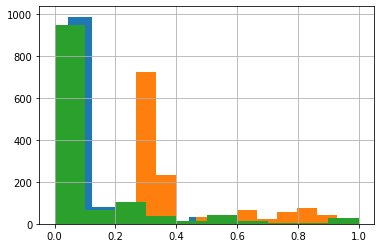

In [41]:
from sklearn.ensemble              import RandomForestClassifier
from sklearn.linear_model          import LogisticRegression
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.naive_bayes           import GaussianNB
from sklearn.model_selection       import GridSearchCV
from sklearn.metrics               import confusion_matrix, accuracy_score, roc_auc_score, balanced_accuracy_score, precision_score, f1_score
from sklearn.svm                   import SVC 
import warnings
warnings.filterwarnings('ignore')

svm          = SVC()
logistic     = LogisticRegression()
randomForest = RandomForestClassifier()
knn          = KNeighborsClassifier()


models = {
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "knn"          :knn
          #"svm"      : svm
         }

#Grid Values to loop through
grid_values = {
    "logistic":{"solver":["lbfgs", "newton-cg", "sag", "saga"],'penalty': ['l2'],'C':[0.1, 1, 5, 10, 0.01], 
                "max_iter":[100, 200, 300], "class_weight":[None, "balanced"]},
    "randomForest":{"max_depth":[3,4,5,6,8,10], "n_estimators":[600, 250, 500, 100], "class_weight":["balanced"], 
                    "max_features":["auto","sqrt", "log2"]},
    "knn":{"n_neighbors":[15,3,5,7,9,10,12], "weights":["distance"], "leaf_size":[2,4,5,3,8]},
    #"svm" : {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
}

overview = pd.DataFrame()
ing_pred = pd.DataFrame()

for model in models:

    grid_clf_acc = GridSearchCV(models[model], cv=3, param_grid = grid_values[model], scoring = 'average_precision')
    grid_clf_acc.fit(X_train, y_train)

    y_pred = grid_clf_acc.predict(X_valid)
    
    probabilities = pd.DataFrame(grid_clf_acc.predict_proba(X_valid))[1]
    auc           = roc_auc_score(np.array(y_valid),np.array(probabilities))
    acc           = accuracy_score(y_valid,y_pred)
    precision     = precision_score(y_valid,y_pred)
    f1            = f1_score(y_valid,y_pred)
    
    print(model, "\t", "AUC:", auc, "\nAccuracy:", acc, "\nPrecision:", precision,"\n" ,"\nF1:", f1,"\n",grid_clf_acc.best_params_)

    overview[model] = [auc, acc, grid_clf_acc.best_params_]
    
    cmtx = pd.DataFrame(
    confusion_matrix(y_valid, y_pred), 
    index=['true:yes', 'true:no'], 
    columns=['pred:yes', 'pred:no'])

    print(cmtx, "\n")
    probabilities.hist()

overview.index = ["AUC", "Accuracy", "best params"]

In [ ]:
# In this juputer notebook, we implemented random forest, logistic regression, SVM, KNN models. Neural Network is implemented in another file.

In this juputer notebook, I implemented random forest, logistic regression, SVM, KNN models. I tried seveal times to run SVM model on my laptop, but it never finishes training. Threrefore in this report, I don't have the any result for SVM model. In addition, neural network is implemented in another file.

For each model, I used grid search for the  hyper parameter tuning. 
In the training process, I used 3 folds cross volidations.
For measurements, I used AUC, accuracy, Precision, F1 score.

                
For logistic regression, I used {"solver":["lbfgs", "newton-cg", "sag", "saga"],'penalty': ['l2'],'C':[0.1, 1, 5, 10, 0.01],"max_iter":[100, 200, 300]} as our hyper parameter grid. To balance the classes, I used "class_weight":["balanced","None"]. 
 As shown in the results, the best performing parameter combination is  {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}.
 We get AUC of 0.78, Accuracy of 0.89, Precision of 0.65 and F1: 0.33 for this model.


For random forest, we choosed max_depth: [3,4,5,6,8,10], estimators:[600, 250, 500, 100], max_features:["auto","sqrt", "log2"] as our hyper parameter grid. To balance the classes, I used "class_weight":["balanced","None"]. 
As shown in the results, the best performing parameter combination is {'class_weight': 'balanced', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 600}.
We get AUC of 0.79, Accuracy of 0.82, Precision of 0.33 and F1: 0.43 for this model.


For knn, I choosed "knn":{"n_neighbors":[15,3,5,7,9,10,12], "weights":["distance"], "leaf_size":[2,4,5,3,8]} as the hyper parameter grid.
As shown in the results, the best performing parameter combination is {'leaf_size': 4, 'n_neighbors': 15, 'weights': 'distance'}.
We get AUC of 0.66, Accuracy of 0.88, Precision of 0.50 and F1: 0.31 for this model.

For svm,  I used : {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']} as the hyper parameter grid. But since the computation cost is pretty  high and it never finishes training even without using the grid search.

Note: during the model building process, I used part of the code written by me and other team members in the Hackthon (MealHero) group for the Hackthon project.